# Necessary libraries:

In [21]:
#conda==24.11.1
#matplotlib==3.9.2
#numpy==1.26.4
#pandas==2.2.2
#
# Data manipulation and analysis
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#
from datetime import datetime, timedelta
#from sklearn.mixture import GaussianMixture
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap

# Setup environments

In [2]:
# environmentVariable = 'server'
# environmentVariable = 'local'
environmentVariable = 'local'
if environmentVariable == 'local':
  data_path = "C:/Users/sebbas/Construct/Data/" 

elif environmentVariable == 'server':
    # to be defined
    data_path = "/media/....."

print(datetime.now(), ' environment: ', environmentVariable, "path ", data_path)

data_path_figures=data_path+"Figures/"
print(data_path_figures)
print("Environment was created")

2025-11-08 22:02:07.131977  environment:  local path  C:/Users/sebbas/Construct/Data/
C:/Users/sebbas/Construct/Data/Figures/
Environment was created


# Read CSV file with data from L-PBF experiment

In [7]:

######
file_reference="L-PBF"
dataFileB=data_path+"SS316-1.csv"
dfB = pd.read_csv(dataFileB,delimiter=";",skiprows=0)  # Replace with your file path
# Clean the NAN data
num_columns_before = dfB.shape[1]
print(dfB.head())

dfB_cleaned = dfB.dropna(axis=1, how="all")
num_columns_after = dfB_cleaned.shape[1]

# Display the first 5 rows
print("Data file: ", dataFileB, " shape of df:", dfB.shape)
num_columns_dropped = num_columns_before - num_columns_after
print(f"Number of columns dropped: {num_columns_dropped}")

# Get list of dropped columns
dropped_columns = list(set(dfB.columns) - set(dfB_cleaned.columns))
print("Dropped columns:", dropped_columns)

print(file_reference)
balling_palette = {0: '#388E3C', 1: '#D32F2F'}  # green, red
balling_reference = {
    0: 'No defects',
    1: 'Defects'
}

# Define mapping from column names to descriptive labels
column_titles = {
    'Powder size': 'Powder size',
    'Laser power': 'Laser power  (W)',
    'Scan speed': 'Scan speed (mm/s)',
    'Beam diameter': 'Beam diameter',
    'Layer thickness': 'Layer thickness',
    'Thermal diffusivity': 'Thermal diffusivity',
    'PowerOverSpeed': 'Power/speed  (J/mm)',
    'NormalizedEnergy': 'Normalized \"energy\"', 
}

# Define mapping from column names to descriptive labels
column_labels = {
    'Powder size': 'powder size',
    'Laser power': 'laser power',
    'Scan speed': 'scan speed',
    'Beam diameter': 'beam diameter',
    'Layer thickness': 'layer thickness',
    'Thermal diffusivity': 'thermal diffusivity',
    'PowerOverSpeed': 'power/speed',
    'NormalizedEnergy': 'normalized \"energy\"'
}
PBF_SS316_1_SpecificHeat=500
# Assuming your DataFrame is named df
dfB_cleaned['PowerOverSpeed'] = dfB_cleaned['Laser power'] / dfB_cleaned['Scan speed']
dfB_cleaned['NormalizedEnergy'] = dfB_cleaned['Laser power'] / (PBF_SS316_1_SpecificHeat*dfB_cleaned['Scan speed'])
#
# Count the number of times Balling is 0 and 1
#count_0 = (dfB_cleaned["Balling"] == -1).sum()
count_1 = (dfB_cleaned["Balling"] == 0).sum()
count_2 = (dfB_cleaned["Balling"] == 1).sum()
#print("Number of times no defects:", count_0, " ",count_0/(count_0+count_1+count_2))
print("Number of times no defects:", count_1, " ",count_1/(count_1+count_2))
print("Number of times defects:", count_2,  " ",count_2/(count_1+count_2))
print("Total:", count_1+count_2)

     alloy  Powder size  Laser power  Scan speed  Beam diameter  \
0  SS316-1         36.6           25          80           0.08   
1  SS316-1         36.6           25         110           0.08   
2  SS316-1         36.6           25         140           0.08   
3  SS316-1         36.6           50          50           0.08   
4  SS316-1         36.6           50          80           0.08   

   Layer thickness  Thermal diffusivity  Balling  Unnamed: 8  
0              0.1              0.00002        1         NaN  
1              0.1              0.00002        1         NaN  
2              0.1              0.00002        1         NaN  
3              0.1              0.00002        1         NaN  
4              0.1              0.00002        1         NaN  
Data file:  C:/Users/sebbas/Construct/Data/SS316-1.csv  shape of df: (44, 9)
Number of columns dropped: 1
Dropped columns: ['Unnamed: 8']
L-PBF
Number of times no defects: 23   0.5227272727272727
Number of times defects

# Control parameters for the visualizations

In [8]:
# Font sizes control
#SMALL_SIZE = 16
#MEDIUM_SIZE = 18
#BIGGER_SIZE = 20
#figure_size=(10, 6)
#plt.figure(figsize=figure_size)
#plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
#plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
#plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
#plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
#plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
SMALL_SIZE = 24
MEDIUM_SIZE = 28
BIGGER_SIZE = 32
figure_size=(8,6)
plt.figure(figsize=figure_size)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<Figure size 800x600 with 0 Axes>

# Examples of data visualizaiton

Not enough values to plot a density estimation
Col: Laser power
C:/Users/sebbas/Construct/Data/Figures/L-PBF_Laser power.png


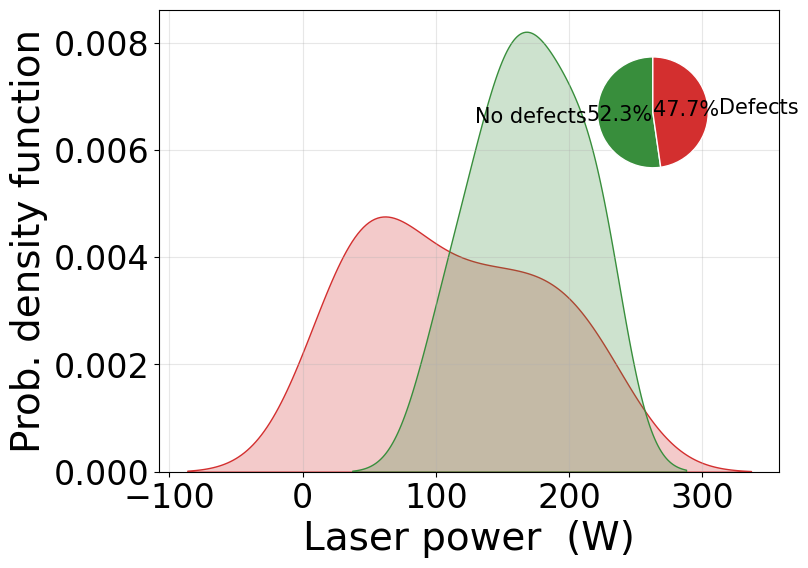

Col: Scan speed
C:/Users/sebbas/Construct/Data/Figures/L-PBF_Scan speed.png


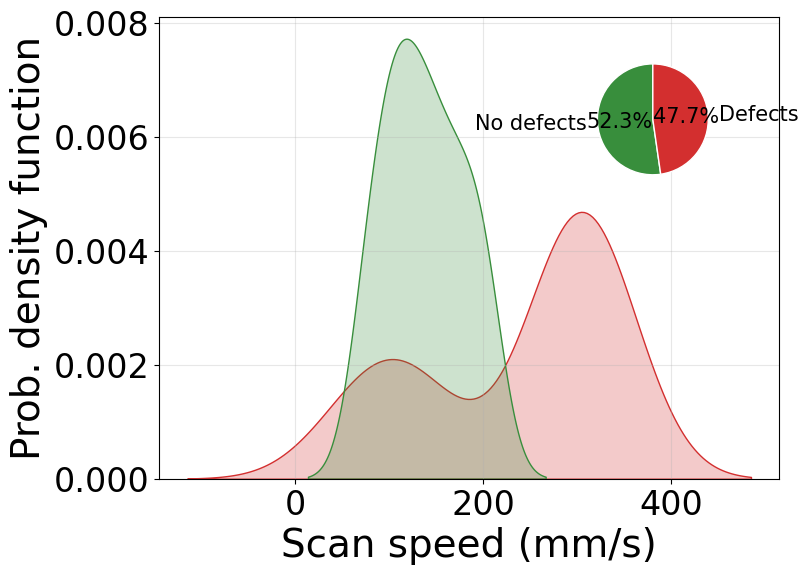

Not enough values to plot a density estimation
Not enough values to plot a density estimation
Not enough values to plot a density estimation
Col: PowerOverSpeed
C:/Users/sebbas/Construct/Data/Figures/L-PBF_PowerOverSpeed.png


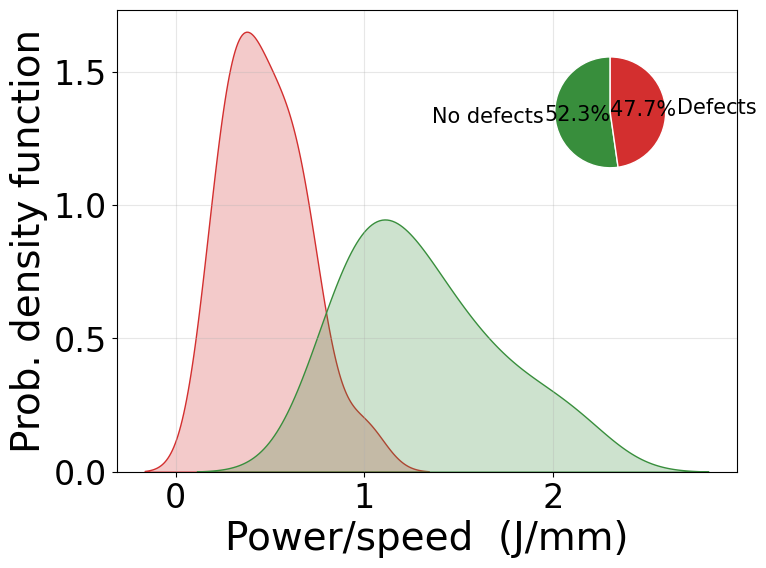

Col: NormalizedEnergy
C:/Users/sebbas/Construct/Data/Figures/L-PBF_NormalizedEnergy.png


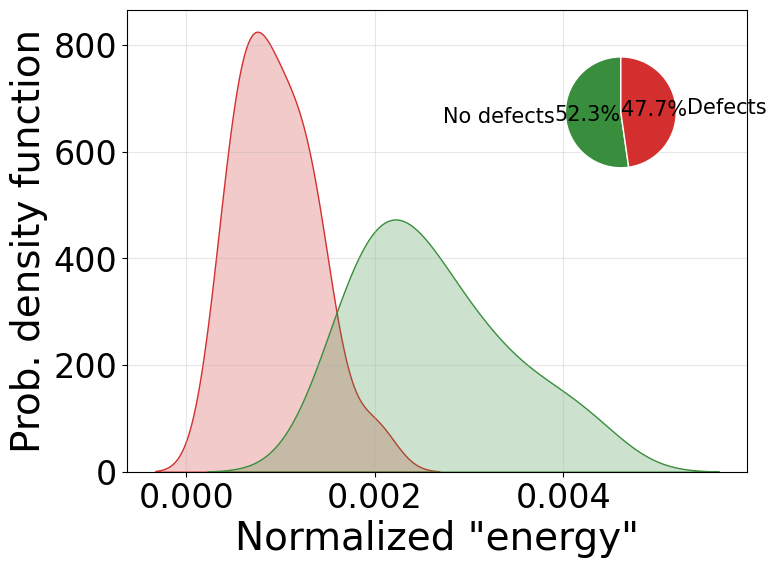

In [ ]:
for col, label in column_titles.items():
    if col in ["Powder size","Beam diameter","Layer thickness", "Thermal diffusivity"]:
        print("Not enough values to plot a density estimation")
    else:  
        fig, ax = plt.subplots(figsize=figure_size)
        print("Col:", col)
        # KDE plot with consistent hue order
        sns.kdeplot(
            data=dfB_cleaned,
            x=col,
            hue='Balling',
            hue_order=list(balling_palette.keys()),
            fill=True,
            common_norm=False,
            palette=balling_palette,
            ax=ax,
            legend=False
        )
        
        labelTitle=column_labels[col]
        #ax.set_title(f'Influence of {labelTitle} on melt pool defects (PBF dataset)')
        ax.set_xlabel(label)
        ax.set_ylabel('Prob. density function')
        ax.grid(True, alpha=0.3)

        # Boxplot inset - smaller and lower
        #box_ax = inset_axes(
        #    ax,
        #    width="18%", height="14%",
        #    bbox_to_anchor=(0.385, 0.07, 1, 1),
        #    bbox_transform=ax.transAxes,
        #    loc='center'
        #)

        # Prepare data and colors for boxplot using consistent order
        ordered_keys = list(balling_palette.keys())
        #box_data = [dfB_cleaned[dfB_cleaned['Balling'] == val][col] for val in ordered_keys]
        #box_colors = [balling_palette[val] for val in ordered_keys]

        # Create boxplot with colored boxes and smaller outlier dots
        #bp = box_ax.boxplot(
        #    box_data,
        #    patch_artist=True,
        #    flierprops=dict(marker='o', markersize=3, markerfacecolor='black', linestyle='none')
        #)
        #for patch, color in zip(bp['boxes'], box_colors):
        #    patch.set_facecolor(color)

        # Adjust y-axis to show outliers
        #y_min = min([series.min() for series in box_data])
        #y_max = max([series.max() for series in box_data])
        #padding = (y_max - y_min) * 0.1
        #box_ax.set_ylim(y_min - padding, y_max + padding)

        #box_ax.set_xticklabels([balling_reference[val] for val in ordered_keys], rotation=45, fontsize=10)
        #box_ax.tick_params(axis='y', labelsize=6)
        #box_ax.grid(True, alpha=0.3)

        # Pie chart inset - larger and higher
        
        font_Pie=15
        font_Box=15
        pie_width = "105%"
        pie_height = "105%"
        pie_anchor = (0.685, 0.7, 0.31, 0.31)
        pie_location = "center"
        pie_borderpad = 0
        pie_ax = inset_axes(ax, width="30%", height="30%", loc='upper right', borderpad=1)
        balling_counts = dfB_cleaned['Balling'].value_counts()
        pie_ax.pie(
            balling_counts.loc[ordered_keys],
            labels=[balling_reference[val] for val in ordered_keys],
            colors=[balling_palette[val] for val in ordered_keys],
            startangle=90,
            autopct='%1.1f%%',
            pctdistance=0.6,
            labeldistance=1.2,
            wedgeprops=dict(edgecolor='white'),
            textprops={'fontsize': font_Pie}
        )
        pie_ax.set_aspect('equal')
        pie_ax.axis('off')
        print(data_path_figures+file_reference+"_"+col+".png")
        #plt.savefig(data_path_figures+file_reference+"_"+col+".png", format='png')
        #plt.savefig(data_path_figures+file_reference+"_"+col+"_"+"_"+".png",pad_inches=0.1, dpi=500,format='png',bbox_inches='tight')
        
        plt.show()

# Balling prediction

## Data preparation for the modeling

In [19]:
#
#file_reference=dataset["B"]
#dataFileB=data_path+"SS316-1.csv"
#dfB = pd.read_csv(dataFileB,delimiter=";",skiprows=0)  # Replace with your file path
# Clean the NAN data
num_columns_before = dfB.shape[1]
#print(dfB.head())

dfB_cleaned = dfB.dropna(axis=1, how="all")
num_columns_after = dfB_cleaned.shape[1]
# Display the first 5 rows
num_columns_dropped = num_columns_before - num_columns_after
print(f"Number of columns dropped: {num_columns_dropped}")
#print(dfB_cleaned.head())

# Check: get list of dropped columns
dropped_columns = list(set(dfB.columns) - set(dfB_cleaned.columns))
print("Dropped columns:", dropped_columns)

# Remove the first column
dfB_cleaned = dfB_cleaned.drop(dfB_cleaned.columns[[0,1,4,5,6]], axis=1)
#
X = dfB_cleaned.iloc[:, :-1].values
y = dfB_cleaned.iloc[:, -1].values
#
print(X.shape)

Number of columns dropped: 1
Dropped columns: ['Unnamed: 8']
(44, 2)


Class distribution in y_train:
Class 0: 20
Class 1: 15
Number of dots y test=0 in the scatter plot: 3
Number of dots y test=1 in the scatter plot: 6


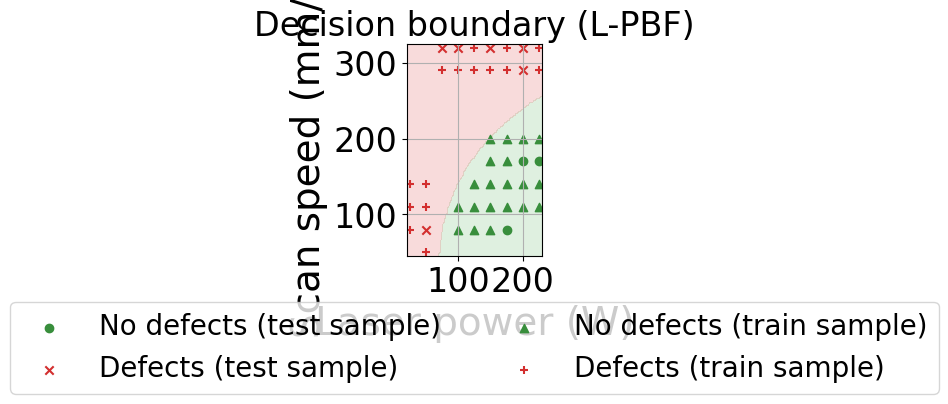

In [ ]:
balling_reference = {0: 'No defects', 1: 'Defects'}
balling_palette = {'No defects': '#388E3C', 'Defects': '#D32F2F'}
###
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
figure_size=(10, 6)
plt.figure(figsize=figure_size)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
###
# Palette of colors
light_palette = ListedColormap(['#81C784', '#E57373'])  # light green, light red

# Grid for the visualization of the decision boundaries (for 2D Data)
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-5, X[:, 0].max()+5, 100),
                         np.linspace(X[:, 1].min()-5, X[:, 1].max()+5, 100))
grid = np.c_[xx.ravel(), yy.ravel()]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
print("Class distribution in y_train:")
print("Class 0:", np.sum(y_train == 0))
print("Class 1:", np.sum(y_train == 1))

# Fit GMMs to training data for each class
gmm_class0 = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm_class0.fit(X_train[y_train == 0])
#
gmm_class1 = GaussianMixture(n_components=1, covariance_type='full', random_state=42)
gmm_class1.fit(X_train[y_train == 1])
#
# Compute likelihood for the entire grid
log_likelihood_class0_grid = gmm_class0.score_samples(grid)
log_likelihood_class1_grid = gmm_class1.score_samples(grid)

decision_boundary = (log_likelihood_class1_grid > log_likelihood_class0_grid).reshape(xx.shape)

# Plot decision boundary using your custom colormap
#figure_size=(1, 6)
plt.contourf(xx, yy, decision_boundary, alpha=0.25, cmap=light_palette)
# Plot test data
num_points = (y_test == 0).sum()
print(f"Number of dots y test=0 in the scatter plot: {num_points}")
num_points = (y_test == 1).sum()
print(f"Number of dots y test=1 in the scatter plot: {num_points}")

plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c=balling_palette["No defects"], marker='o', label='No defects (test sample)')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c=balling_palette["Defects"], marker='x', label='Defects (test sample)')    
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], c=balling_palette["No defects"], marker='^', label='No defects (train sample)')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], c=balling_palette["Defects"], marker='+', label='Defects (train sample)')

plt.title("Decision boundary (L-PBF)")
plt.xlabel("Laser power (W)\n ")
plt.ylabel("Scan speed (mm/s)")
plt.grid(True)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize='small')
plt.tight_layout()
#print(data_path_figures + file_reference + "-" + "ArxivDecisionBoundPBF.png")
#plt.savefig(data_path_figures + file_reference + "-" + "ArxivDecisionBoundPBF.png", pad_inches=0.1, dpi=500, format='png', bbox_inches='tight')
plt.show()